In [57]:
import pandas as pd

# Load CSV
df = pd.read_csv('Processed_Reviews.csv')
df.head()

,Review,lowercased,urls_removed,html_removed,emojis_removed,slangs_replaced,contractions_replaced,punctuations_removed,numbers_removed,spelling_corrected,stopwords_removed,stemmed_words,lemmatized,tokenized,label
0,The product arrived on time. Packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,product arrived time packaging great quality a...,product arriv time packag great qualiti amaz,product arrive time packaging great quality am...,"['product', 'arrive', 'time', 'packaging', 'gr...",1
1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing i love it,this product is just amazing i love it,this product is just amazing i love it,product amazing love,product amaz love,product amaze love,"['product', 'amaze', 'love']",1
2,"I bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...",i bought this phone for 799 and it has a 120hz...,i bought this phone for and it has a hz displ...,i bought this phone for and it has a hz displ...,bought phone hz display totally worth,bought phone hz display total worth,buy phone hz display totally worth,"['buy', 'phone', 'hz', 'display', 'totally', '...",1
3,Wow!!! This product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow product awesome bit expensive,wow product awesom bit expens,wow product awesome bit expensive,"['wow', 'product', 'awesome', 'bit', 'expensive']",0
4,The laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine,the laptop works perfectly fine,the laptop works perfectly fine,laptop works perfectly fine,laptop work perfectli fine,laptop work perfectly fine,"['laptop', 'work', 'perfectly', 'fine']",0


In [58]:
# Step 3: Preprocessing
# Use only the lemmatized column and ensure label is numeric
df = df[['lemmatized', 'label']]
df['label'] = df['label'].astype(int)
df.head()

,lemmatized,label
0,product arrive time packaging great quality am...,1
1,product amaze love,1
2,buy phone hz display totally worth,1
3,wow product awesome bit expensive,0
4,laptop work perfectly fine,0


In [59]:
# Step 4: Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df['lemmatized'])
y = df['label']

In [60]:
# Step 5: Model Training
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifiers
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Naive Bayes Accuracy: 1.00

SVM Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

SVM Accuracy: 1.00


C:\Users\jeyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\jeyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


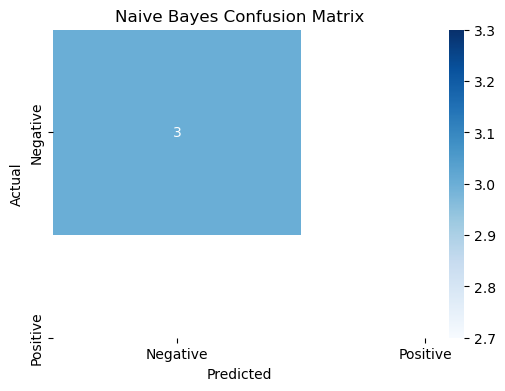

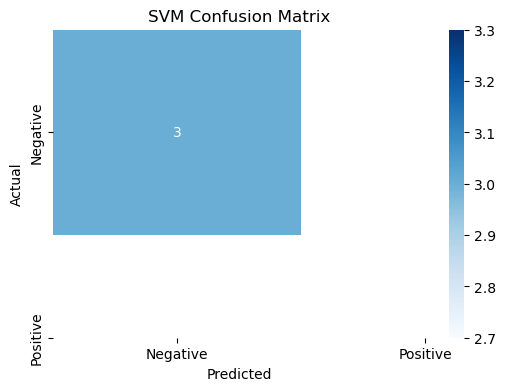

In [61]:
# Step 6: Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, nb_pred))
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_pred):.2f}")

# Confusion Matrix - Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)

# SVM
svm_pred = svm_model.predict(X_test)
print("\nSVM Classification Report:\n")
print(classification_report(y_test, svm_pred))
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.2f}")

# Confusion Matrix - SVM
svm_cm = confusion_matrix(y_test, svm_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(nb_cm, classes=['Negative', 'Positive'], title='Naive Bayes Confusion Matrix')
plot_confusion_matrix(svm_cm, classes=['Negative', 'Positive'], title='SVM Confusion Matrix')
